<a href="https://colab.research.google.com/github/alwiyahya99/MachineLearning/blob/main/Latihan_SKLearn_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tahapan pada latihan kali ini adalah sebagai berikut:


*   Konversi data menjadi Dataframe.
*   Lakukan preprocessing data.
*   Hilangkan kolom 'CustomerID' dan 'gender'.
*   Latih model K-Means.
*   Buat plot untuk Elbow dan Cluster.

In [ ]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# tampilkan 3 baris pertama pada data
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
# ubah nama kolom
df =df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female','Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preproces
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [ ]:
from sklearn.cluster import KMeans

# menghilangkan kolom customers id dan gender
x =df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

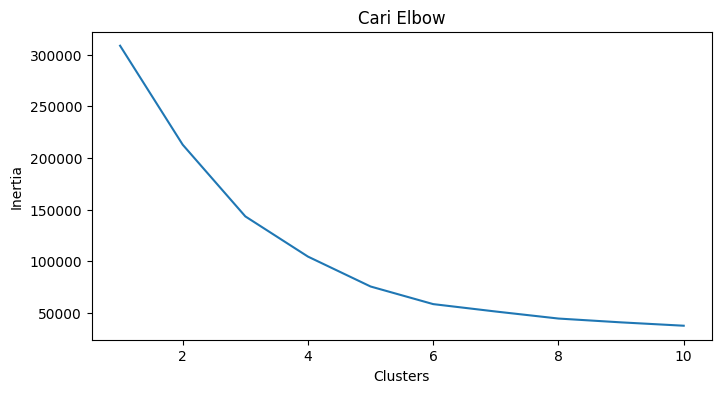

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


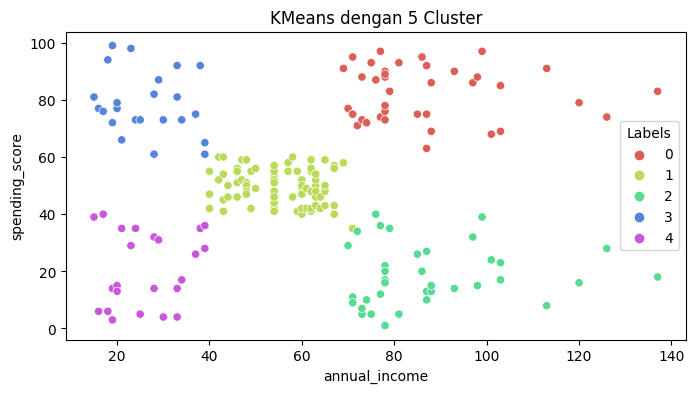

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()